In [3]:
%matplotlib inline
%load_ext autoreload

%autoreload 2

import os
import sys
import itertools
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"
from dnc.dnc import DNC
from feedforward_controller import FeedforwardController
from tensorflow.examples.tutorials.mnist import input_data
from tqdm import tqdm
import time
from dnc import utility as uf

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:

with tf.device("/cpu:0"):
    O = uf.window_vector(tf.Variable(np.random.random((1, 10,10))), tf.Variable(1), tf.Variable(1),tf.Variable(3))
    sess = tf.Session()
    init = tf.global_variables_initializer()
    sess.run(init)
    print O.eval(session=sess).shape

(1, 3, 3)


3


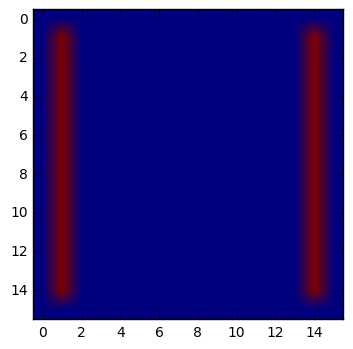

In [48]:
size = 16

print label
plt.imshow(im)

In [ ]:
def get_rectangle_images_size(bsize, size=4, splits=2):
    X = []
    Xstag = []
    y = []
    for i in range(bsize):
        pos = np.random.random() < 0.5
        im = np.zeros((size,size))
        if pos:
            im[1:size-1, 1:size-1] = 1
        else:
            im[size/2-1:size/2+1, size/2-1:size/2+1] = 1
        
        Xstag.append(get_staggered_im(im, size, splits))
        X.append(im)
        label = np.zeros(2)
        label[pos] = 1
        y.append(label)
    return np.array(Xstag), np.array(X), np.array(y)

In [52]:
Xstag, X, y = uf.get_lrb_images(1, size=8, splits=2)


0


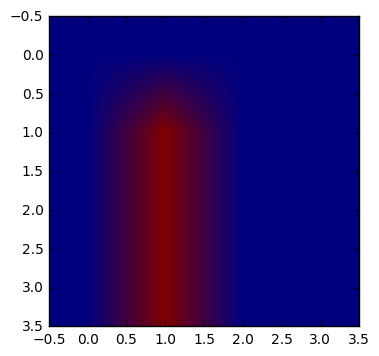

1


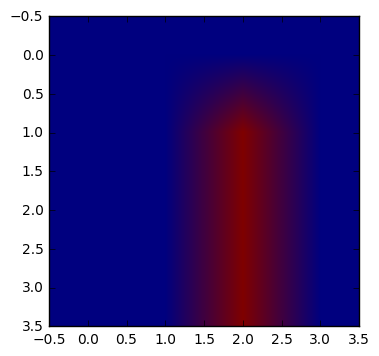

2


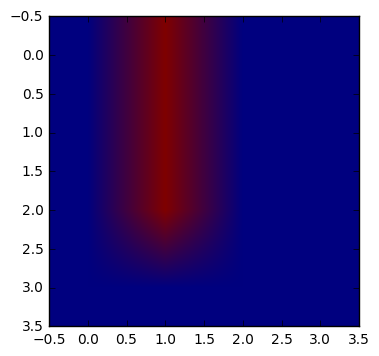

3


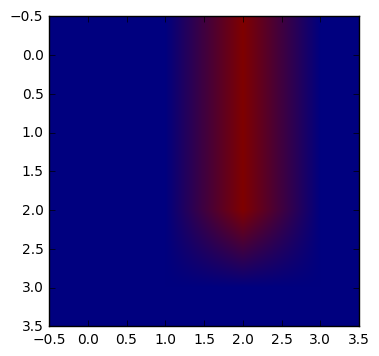

In [58]:

Xstag, X, y = uf.get_lrb_images(1, size=8, splits=2)
for i, x in enumerate(Xstag[0]):
    print i
    plt.figure()
    plt.imshow(np.reshape(x, (4,4)))
    plt.show()

In [11]:
x.shape

(16,)

In [26]:
v[3:6, 3:6]

<tf.Tensor 'strided_slice_8:0' shape=(3, 3) dtype=float64>